<a href="https://colab.research.google.com/github/Uday-ashes-uday/Pytorch-with-MNIST-Dataset/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import torch
import torch.nn as nn
from torchvision import datasets,transforms
import matplotlib.pyplot as plt

In [86]:
transform=transforms.ToTensor()

#transform=transforms.Compose([transforms.ToTensor(),
#                   transforms.Normalize((0.5),(0.5))])

train_dataset=datasets.MNIST(root='/content/mnist_a',
                                  train=True,
                                  download=True,
                                  transform=transform)

In [87]:
from torch.utils.data import DataLoader

train_loader=DataLoader(train_dataset,batch_size=64,shuffle=True)

In [88]:


#get first batch of images from train loader

images,labels=next(iter(train_loader))
#torch.min(images)
torch.max(images),torch.min(images)

(tensor(1.), tensor(0.))

In [89]:
images[0].shape

torch.Size([1, 28, 28])

In [90]:
#creating an autoencoder class

class Autoen(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder=nn.Sequential(nn.Linear(28*28,128),
                               nn.ReLU(),
                               nn.Linear(128,64),
                               nn.ReLU(),
                               nn.Linear(64,32),
                               nn.ReLU(),
                               nn.Linear(32,12),
                               nn.ReLU(),
                               nn.Linear(12,3))

    self.decoder=nn.Sequential(nn.Linear(3,12),
                               nn.ReLU(),
                               nn.Linear(12,32),
                               nn.ReLU(),
                               nn.Linear(32,64),
                               nn.ReLU(),
                               nn.Linear(64,128),
                               nn.ReLU(),
                               nn.Linear(128,784),
                               nn.Sigmoid())

  def forward(self,x):
    encoded=self.encoder(x)
    decoded=self.decoder(encoded)
    return decoded


In [91]:
model=Autoen()

#loss function and optimizer

loss_fn=nn.MSELoss()
optim=torch.optim.Adam(model.parameters(),lr=1e-3)

In [92]:
num_epochs=10
in_images=[]
reconstructed_images=[]

for i in range(num_epochs):
  for images,_ in train_loader:
    images=images.reshape(-1,28*28)
    reconstructed=model(images)

    #calculate loss

    loss=loss_fn(reconstructed,images)
    optim.zero_grad()
    loss.backward()
    optim.step()

  print(f'Epoch {i} || Loss:{loss.item()}')




Epoch 0 || Loss:0.04316525533795357
Epoch 1 || Loss:0.03583355247974396
Epoch 2 || Loss:0.045006245374679565
Epoch 3 || Loss:0.03908897936344147
Epoch 4 || Loss:0.03440671041607857
Epoch 5 || Loss:0.032447557896375656
Epoch 6 || Loss:0.03252294287085533
Epoch 7 || Loss:0.028307905420660973
Epoch 8 || Loss:0.03199293836951256
Epoch 9 || Loss:0.033364731818437576


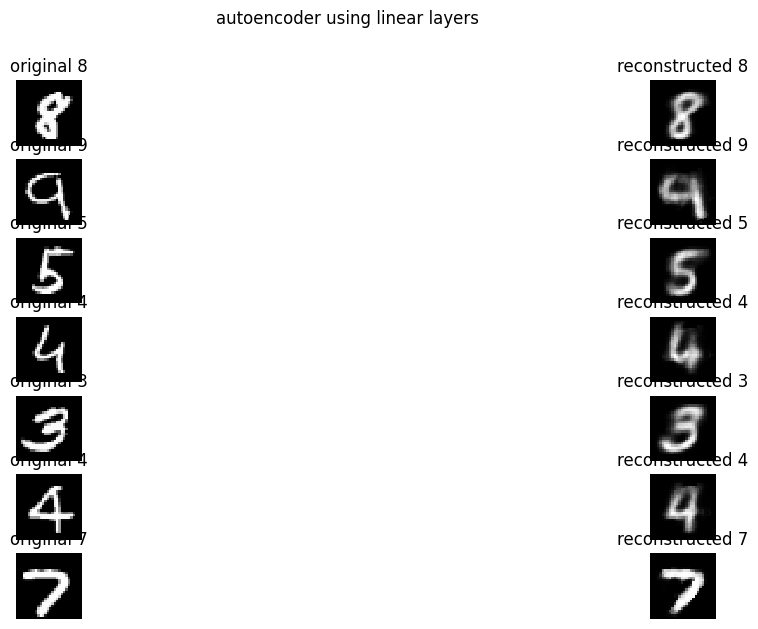

In [95]:
#visualizing original and reconstructed images
or_images=images
re_images=reconstructed
labels=_

#plt.figure(10,9)
li=[images.detach().numpy(),reconstructed.detach().numpy()]
fig,ax=plt.subplots(7,2,figsize=(15,7))
titles=['original','reconstructed']
fig.suptitle('autoencoder using linear layers')
for i in range(7):
  for j in range(2):

      ax[i][j].imshow(li[j][i].reshape(28,28),interpolation='none')

      ax[i][j].set_title(f'{titles[j]} {labels[i]}')
      ax[i][j].axis('off')